In [1]:
# Read and Inspect Data

import pandas as pd

# Read data
dfDefault = pd.read_csv(r"C:\Users\noman\My Drive\ABP\ABP DSBA Batch 03\Unit 02\Session 03_LogRegContd_Rcode_decision tree\default.csv")

# Show some basic info and the first few rows
print(dfDefault.head(10))
print(dfDefault.describe())
print(dfDefault.info())

  default student      balance        income
0      No      No   729.526495  44361.625070
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138950
3      No      No   529.250605  35704.493940
4      No      No   785.655883  38463.495880
5      No     Yes   919.588531   7491.558572
6      No      No   825.513331  24905.226580
7      No     Yes   808.667504  17600.451340
8      No      No  1161.057854  37468.529290
9      No      No     0.000000  29275.268290
            balance        income
count  10000.000000  10000.000000
mean     835.374886  33516.981876
std      483.714985  13336.639563
min        0.000000    771.967729
25%      481.731105  21340.462905
50%      823.636973  34552.644800
75%     1166.308387  43807.729275
max     2654.322576  73554.233500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10

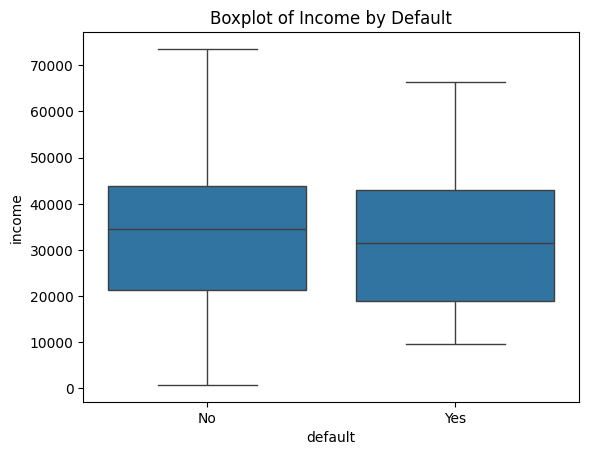

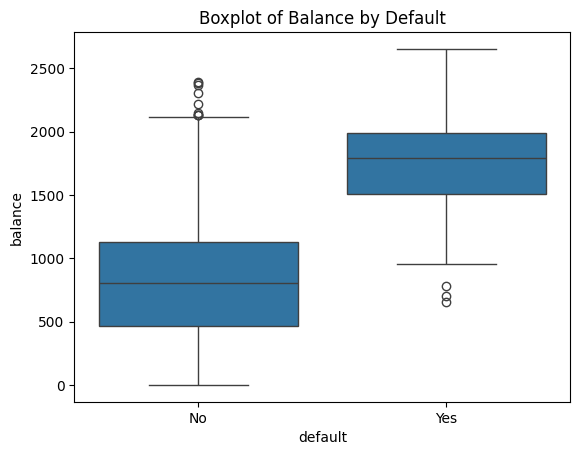

In [2]:
# Create Boxplots

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for 'default' vs 'income'
sns.boxplot(x='default', y='income', data=dfDefault)
plt.title("Boxplot of Income by Default")
plt.show()

# Boxplot for 'default' vs 'balance'
sns.boxplot(x='default', y='balance', data=dfDefault)
plt.title("Boxplot of Balance by Default")
plt.show()

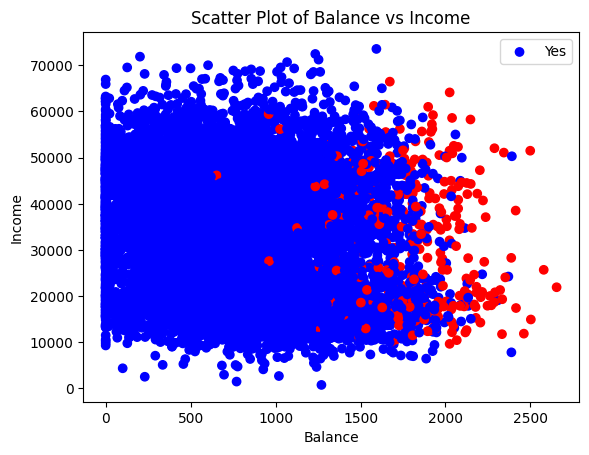

In [3]:
# Scatter Plot for 'balance' and 'income'

colors = {'Yes':'red', 'No':'blue'}
plt.scatter(dfDefault['balance'], dfDefault['income'], c=dfDefault['default'].map(colors))
plt.xlabel("Balance")
plt.ylabel("Income")
plt.title("Scatter Plot of Balance vs Income")
plt.legend(['Yes', 'No'])
plt.show()

In [4]:
# Convert Categorical Variable 'default' to Numerical

#dfDefault['default_Yes'] = dfDefault['default'].apply(lambda x: 1 if x == 'Yes' else 0)
# Easier way to do the same thing
dfDefault['default_Yes'] = dfDefault['default'].map({'Yes': 1, 'No': 0})


In [5]:
# Fit a Linear Model

import statsmodels.api as sm

X = sm.add_constant(dfDefault['balance'])  # adding a constant
y = dfDefault['default_Yes']

linMod = sm.OLS(y, X).fit()
print(linMod.summary())

                            OLS Regression Results                            
Dep. Variable:            default_Yes   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1397.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):          2.77e-286
Time:                        08:10:12   Log-Likelihood:                 3644.8
No. Observations:               10000   AIC:                            -7286.
Df Residuals:                    9998   BIC:                            -7271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0752      0.003    -22.416      0.0

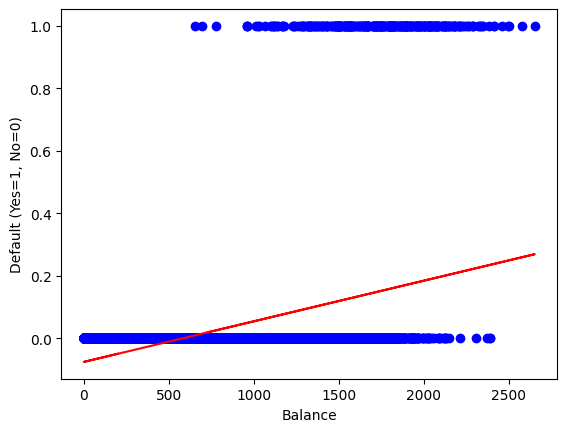

In [6]:
# Use the Model to Make Predictions

dfDefault['y_predLM'] = linMod.predict(X)

plt.scatter(dfDefault['balance'], dfDefault['default_Yes'], color="blue")
plt.plot(dfDefault['balance'], dfDefault['y_predLM'], color="red")
plt.xlabel("Balance")
plt.ylabel("Default (Yes=1, No=0)")
plt.show()

In [7]:
# Fit the Logistic Regression Model

logMod = sm.Logit(y, X).fit()
print(logMod.summary())

# Coefficients
print("Coefficients:", logMod.params)

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 05 Apr 2024   Pseudo R-squ.:                  0.4534
Time:                        08:10:40   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0

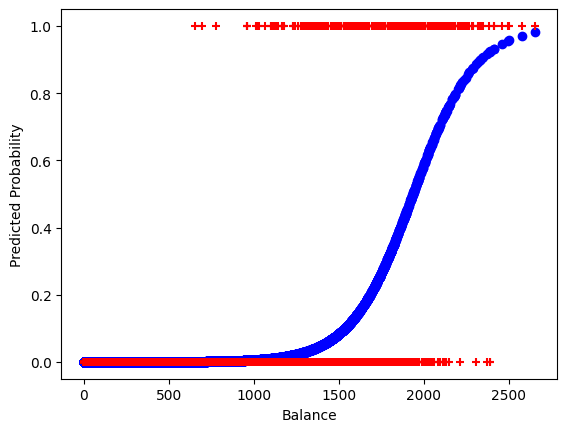

In [8]:
# Plot the Predicted Probabilities

dfDefault['y_predProb'] = logMod.predict(X)

plt.scatter(dfDefault['balance'], dfDefault['y_predProb'], color="blue")
plt.scatter(dfDefault['balance'], dfDefault['default_Yes'], color="red", marker='+')
plt.xlabel("Balance")
plt.ylabel("Predicted Probability")
plt.show()

In [10]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming dfDefault['default_Yes'] is your actual labels and dfDefault['y_pred'] are your predictions
confusion_mat = confusion_matrix(dfDefault['default_Yes'], dfDefault['y_pred'])

# Convert confusion matrix to a DataFrame for better readability
confusion_df = pd.DataFrame(confusion_mat, 
                            index=['Actual: No', 'Actual: Yes'], 
                            columns=['Predicted: No', 'Predicted: Yes'])

print("Confusion Matrix:")
print(confusion_df)

# Continuing to calculate and print the metrics
accuracy = accuracy_score(dfDefault['default_Yes'], dfDefault['y_pred'])
sensitivity = recall_score(dfDefault['default_Yes'], dfDefault['y_pred'])  # Also known as recall or true positive rate
specificity = recall_score(dfDefault['default_Yes'], dfDefault['y_pred'], pos_label=0)  # Also known as true negative rate

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall or TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")


Confusion Matrix:
             Predicted: No  Predicted: Yes
Actual: No            9625              42
Actual: Yes            233             100

Accuracy: 0.9725
Sensitivity (Recall or TPR): 0.3003
Specificity (TNR): 0.9957
